# Importing The Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing The Dataset

In [3]:
#Loading the dataset
bc=pd.read_csv("C:/DSML INTERN/data/Bitcoin.csv")

In [4]:
bc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


In [6]:
bc.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [7]:
bc.shape

(2099760, 8)

In [8]:
#Checking for missing values
bc.isnull().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [9]:
#Removing all the rows with null values
bc.dropna(inplace=True)

In [10]:
bc.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [11]:
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
Timestamp,1990691.0,1.485965e+09,3.579676e+07,1.417412e+09,1.455342e+09,1.486788e+09,1.516933e+09,1.546899e+09
Open,1990691.0,3.246403e+03,3.799154e+03,6.000000e-02,4.195800e+02,1.014580e+03,6.322630e+03,1.989199e+04
High,1990691.0,3.247829e+03,3.801394e+03,6.000000e-02,4.196400e+02,1.014890e+03,6.324010e+03,1.989199e+04
Low,1990691.0,3.244856e+03,3.796761e+03,6.000000e-02,4.195000e+02,1.014150e+03,6.321090e+03,1.989198e+04
Close,1990691.0,3.246403e+03,3.799150e+03,6.000000e-02,4.195700e+02,1.014530e+03,6.322670e+03,1.989199e+04
Volume_(BTC),1990691.0,7.849139e+00,1.873222e+01,1.000000e-08,9.024000e-01,2.692900e+00,7.600965e+00,1.563267e+03
Volume_(Currency),1990691.0,3.600157e+04,1.401879e+05,2.641700e-06,6.440031e+02,3.695642e+03,1.972392e+04,1.997076e+07
Weighted_Price,1990691.0,3.246341e+03,3.799078e+03,6.000000e-02,4.195645e+02,1.014512e+03,6.322550e+03,1.989199e+04


In [12]:
#Timestamp is converted to Human readable Dates
bc['Dates'] = pd.to_datetime(bc['Timestamp'], unit='s')
bc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1417411980,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:33:00
7,1417412400,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:40:00
51,1417415040,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,2014-12-01 06:24:00
77,1417416600,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 06:50:00
1436,1417498140,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0,2014-12-02 05:29:00


In [13]:
bc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Dates
0,1417411980,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:33:00
7,1417412400,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:40:00
51,1417415040,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,2014-12-01 06:24:00
77,1417416600,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 06:50:00
1436,1417498140,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0,2014-12-02 05:29:00


# Checking For The Correlation Between columns

In [14]:
comatrix=bc.corr()
comatrix["Close"].sort_values(ascending = False)


Close                1.000000
Weighted_Price       0.999999
High                 0.999998
Low                  0.999998
Open                 0.999997
Timestamp            0.739841
Volume_(Currency)    0.399670
Volume_(BTC)         0.147858
Name: Close, dtype: float64

In [15]:
comatrix["Volume_(BTC)"].sort_values(ascending = False)

Volume_(BTC)         1.000000
Volume_(Currency)    0.710127
High                 0.148487
Open                 0.147888
Close                0.147858
Weighted_Price       0.147834
Low                  0.147208
Timestamp            0.083118
Name: Volume_(BTC), dtype: float64

In [16]:
comatrix["Volume_(Currency)"].sort_values(ascending = False)

Volume_(Currency)    1.000000
Volume_(BTC)         0.710127
High                 0.400542
Open                 0.399696
Close                0.399670
Weighted_Price       0.399635
Low                  0.398760
Timestamp            0.216426
Name: Volume_(Currency), dtype: float64

In [17]:
comatrix["Weighted_Price"].sort_values(ascending = False)

Weighted_Price       1.000000
Close                0.999999
Open                 0.999999
High                 0.999999
Low                  0.999999
Timestamp            0.739844
Volume_(Currency)    0.399635
Volume_(BTC)         0.147834
Name: Weighted_Price, dtype: float64

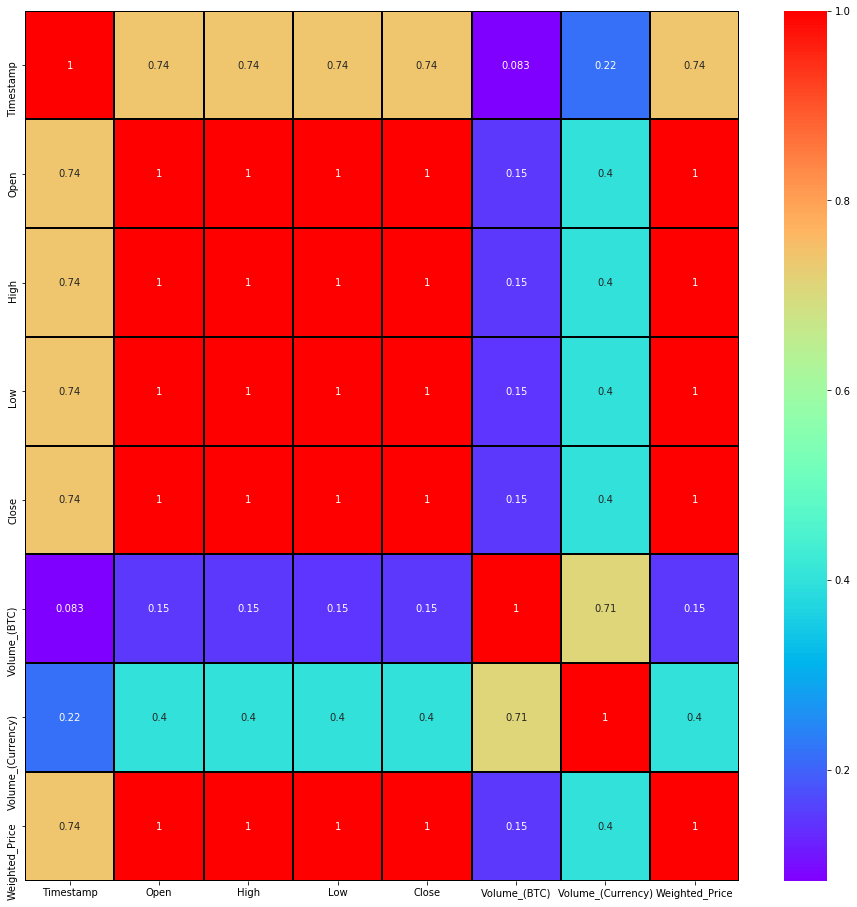

In [18]:
plt.figure(figsize=(16, 16))
sns.heatmap(bc.corr(), annot=True, cmap='rainbow', linewidths=1, linecolor='black')

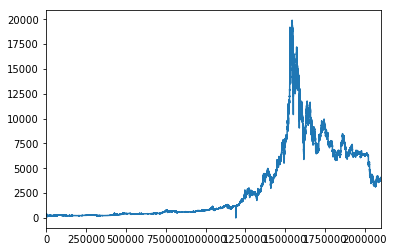

In [22]:
bc['Open'].plot()

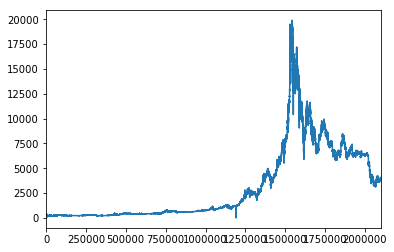

In [23]:
bc['Close'].plot()

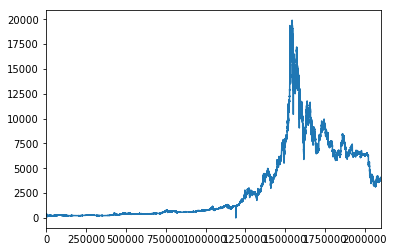

In [24]:
bc['Weighted_Price'].plot()

In [26]:
bc['Difference'] = bc['Close'] - bc['Open']

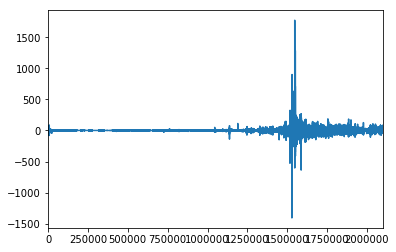

In [27]:
bc['Difference'].plot(kind='line')

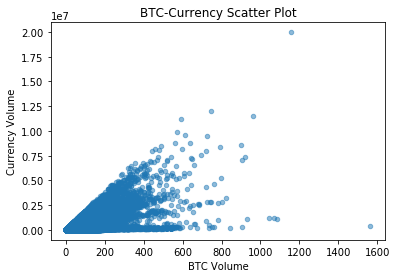

In [21]:
bc.plot(kind='scatter', x='Volume_(BTC)', y='Volume_(Currency)',alpha = 0.5)
plt.xlabel('BTC Volume')            
plt.ylabel('Currency Volume')
plt.title('BTC-Currency Scatter Plot') 
plt.show()

In [23]:
#detecting outliers Function

def detect_outliers(data):
    outlier=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [24]:
x=detect_outliers(bc["Open"])
np.min(x)

14643.99

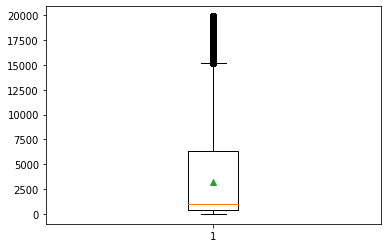

In [25]:
#plotting of x(Outliers)
plt.boxplot(bc["Open"],showmeans=True)
plt.show()

In [26]:
y=detect_outliers(bc["Close"])
np.min(y)

14643.99

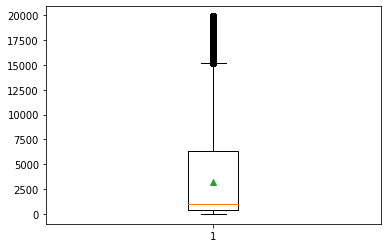

In [27]:
plt.boxplot(bc["Close"],showmeans=True)
plt.show()

# Linear Regression

# Part1: predicting the closing price of the bitcoin 

In [28]:
#independent variables
Training_feature= ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
#dependent variables
Testing_feature = 'Close'


In [29]:
#splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bc[Training_feature], bc[Testing_feature], test_size = 0.3)

In [30]:
x_test.head()

,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price
2057416,3429.54,3429.54,3428.47,0.653358,2240.186569,3428.728276
1648633,10540.01,10547.00,10540.00,3.562425,37560.504834,10543.522370
401489,262.34,262.34,260.67,186.041500,48675.483932,261.637774
2092040,3823.40,3823.41,3823.40,7.323966,28002.483121,3823.404063
1758242,8475.00,8475.00,8455.00,26.780686,226757.925250,8467.218689


In [31]:
#creating the regressor object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [32]:
#fitting the regressor
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_test

2057416     3428.47
1648633    10546.97
401489       260.67
2092040     3823.40
1758242     8455.00
             ...   
642981       414.86
1843425     6227.00
542471       396.07
561366       383.45
539889       407.10
Name: Close, Length: 597208, dtype: float64

In [34]:
#predicting the bitcoin close value
pred=lm.predict(x_test)
pred

array([ 3428.65527745, 10545.71316842,   261.18927247, ...,
         396.09000979,   383.45163251,   407.58693912])

In [35]:
from sklearn.metrics import r2_score

In [36]:
#checking the accuracy of the model
r2_score(y_test,pred)

0.9999991427414859

# Part2: Predicting the Weighted price of the bitcoin

In [39]:
#independent variables
Training_feature= [ 'Close', 'Volume_(BTC)', 'Volume_(Currency)']
#dependent variables
Testing_feature = 'Weighted_Price'

In [44]:
#splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bc[Training_feature], bc[Testing_feature], test_size = 0.3)

In [45]:
x_test.head()

,Close,Volume_(BTC),Volume_(Currency)
647439,419.54,1.066700,447.593318
316045,255.61,3.687831,943.175729
1235433,1832.00,10.276848,18827.185023
1193178,1198.69,4.761471,5707.527194
2015730,6368.01,0.265597,1691.321807


In [46]:
##creating the regressor object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [47]:
#fitting the regressorx
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
  y_test

647439       419.605623
316045       255.753512
1235433     1832.000000
1193178     1198.690000
2015730     6368.011208
               ...     
2041956     4202.189072
1881357     6358.436304
1132927     1222.204678
1607254    10087.887549
2016143     6360.027445
Name: Weighted_Price, Length: 597208, dtype: float64

In [49]:
#predicting the bitcoin close value
pred=lm.predict(x_test)
pred

array([  419.52358847,   255.59591161,  1831.96511905, ...,
        1222.3175703 , 10087.65107629,  6359.96715251])

In [50]:
from sklearn.metrics import r2_score

In [51]:
#checking the accuracy of the model
r2_score(y_test,pred)

0.9999982629141614